In [58]:
import numpy as np
import pandas as pd
import csv, sqlite3

from numpy.ma.extras import stack

from guiapp import GuiApp

In [59]:
conn = sqlite3.connect(":memory:")  # change to 'sqlite:///your_filename.db'

In [60]:
activity_log_df = pd.read_csv("ACTIVITY_LOG.csv")
component_df = pd.read_csv("COMPONENT_CODES.csv")
user_log_df = pd.read_csv("USER_LOG.csv")

In [61]:
activity_log_df

,User Full Name *Anonymized,Component,Action,Target
0,129,Course,Viewed,Content
1,26,Quiz,Updated,Response
2,26,Quiz,Viewed,Attempt
3,86,Assignment,Viewed,Assignment
4,86,Assignment,Viewed,Submission_state
...,...,...,...,...
150830,125,Course,Viewed,Content
150831,86,System,Viewed,Content
150832,129,Course,Viewed,Course
150833,26,Quiz,Viewed,Attempt


In [62]:
user_log_df

,Date,Time,User Full Name *Anonymized
0,17/11/2023 00:00,00:00:00,129
1,10/11/2023 00:00,00:00:01,26
2,10/11/2023 00:00,00:00:02,26
3,20/12/2023 00:00,00:00:02,86
4,20/12/2023 00:00,00:00:03,86
...,...,...,...
150830,20/11/2023 00:00,23:59:47,125
150831,19/12/2023 00:00,23:59:47,86
150832,12/10/2023 00:00,23:59:50,129
150833,09/11/2023 00:00,23:59:56,26


In [63]:
component_df

,Component,Code
0,Course,Cour
1,Quiz,Quiz
2,Assignment,Assign
3,System,Sys
4,Lecture,Lect
5,Study_material,Study_mat
6,Manual,Man
7,Survey,Survey
8,Folder,Fold
9,Attendence,Attend


In [64]:
col_name_change = {'User Full Name *Anonymized': 'User_ID'}
activity_log_df.rename(columns=col_name_change, inplace=True)
user_log_df.rename(columns=col_name_change, inplace=True)

In [65]:
# merge_log_df = pd.merge(user_log_df, activity_log_df, on='User_ID')
merge_log_df = pd.concat([user_log_df, activity_log_df.drop('User_ID', axis=1)], axis=1)

# merge_log_df = pd.merge(merge_log_df, component_df, on='Component', how='left')
merge_log_df

,Date,Time,User_ID,Component,Action,Target
0,17/11/2023 00:00,00:00:00,129,Course,Viewed,Content
1,10/11/2023 00:00,00:00:01,26,Quiz,Updated,Response
2,10/11/2023 00:00,00:00:02,26,Quiz,Viewed,Attempt
3,20/12/2023 00:00,00:00:02,86,Assignment,Viewed,Assignment
4,20/12/2023 00:00,00:00:03,86,Assignment,Viewed,Submission_state
...,...,...,...,...,...,...
150830,20/11/2023 00:00,23:59:47,125,Course,Viewed,Content
150831,19/12/2023 00:00,23:59:47,86,System,Viewed,Content
150832,12/10/2023 00:00,23:59:50,129,Course,Viewed,Course
150833,09/11/2023 00:00,23:59:56,26,Quiz,Viewed,Attempt


In [66]:

# Step 3: Combine 'Date' and 'Time' into a single datetime column
merge_log_df['Date'] = pd.to_datetime(merge_log_df['Date'], format='%d/%m/%Y %H:%M') + pd.to_timedelta(merge_log_df['Time'])

# Drop the original 'Date' and 'Time' columns if no longer needed
merge_log_df = merge_log_df.drop(columns=['Time']).rename(columns={'Date': 'Datetime'})

merge_log_df['Month'] = merge_log_df['Datetime'].dt.to_period('M')

merge_log_df

,Datetime,User_ID,Component,Action,Target,Month
0,2023-11-17 00:00:00,129,Course,Viewed,Content,2023-11
1,2023-11-10 00:00:01,26,Quiz,Updated,Response,2023-11
2,2023-11-10 00:00:02,26,Quiz,Viewed,Attempt,2023-11
3,2023-12-20 00:00:02,86,Assignment,Viewed,Assignment,2023-12
4,2023-12-20 00:00:03,86,Assignment,Viewed,Submission_state,2023-12
...,...,...,...,...,...,...
150830,2023-11-20 23:59:47,125,Course,Viewed,Content,2023-11
150831,2023-12-19 23:59:47,86,System,Viewed,Content,2023-12
150832,2023-10-12 23:59:50,129,Course,Viewed,Course,2023-10
150833,2023-11-09 23:59:56,26,Quiz,Viewed,Attempt,2023-11


In [67]:
pivot_data = merge_log_df.pivot_table(
    index=['User_ID', 'Month'],
    columns='Component',
    values='Action',
    aggfunc='count',
    fill_value=0
)
pivot_data

Component        Assignment  Attendence  Book  Course  Feedback  Folder  \
User_ID Month                                                             
1       2023-09           0           1     0       5         0       0   
        2023-10          51           0     1      24         0       3   
        2023-11          56           0     0      30         0       0   
        2023-12          28           0     0       3         0       4   
2       2023-09           0           0     0       6         0       0   
...                     ...         ...   ...     ...       ...     ...   
153     2023-11          46           0     0      31         0       0   
        2023-12          40           0     0       1         0       1   
154     2023-09           0           1     0      13         0       0   
        2023-10          66           0     3      84         0       1   
        2023-11           7           0     0       4         0       0   

Component        Lecture  Manual  Page  Project  Questionnaire  Quiz  Source  \
User_ID Month                                                                  
1       2023-09        0       3     0        0              1     0       0   
        2023-10       38       8     0        0              0   207       0   
        2023-11        2       4     0        0              0     3       0   
        2023-12        0       0     1        0              0     0       0   
2       2023-09        0       8     0        0              0     0       0   
...                  ...     ...   ...      ...            ...   ...     ...   
153     2023-11       14       0     0        0              0     3       0   
        2023-12        0       0     0        0              0     0       0   
154     2023-09        0       6     0        0              1     0       0   
        2023-10        5      18     0        0              0     4       0   
        2023-11        0       0     0        0              0     0       0   

Component        Study_material  Survey  System  Test  URL  
User_ID Month                                               
1       2023-09               0       0       0     0    0  
        2023-10               1       4      12     0    1  
        2023-11               7       0       0   215    0  
        2023-12               3       0      11     0    1  
2       2023-09               0       0       0     0    0  
...                         ...     ...     ...   ...  ...  
153     2023-11               6       0       0   482    0  
        2023-12               0       0       5     0    2  
154     2023-09               0       0       0     0    0  
        2023-10               7       7       4     0    1  
        2023-11               0       0       0     0    0  

[566 rows x 18 columns]

In [68]:
pivot_data.columns = [col for col in pivot_data.columns]
pivot_data = pivot_data.reset_index()

In [69]:
pivot_data

,User_ID,Month,Assignment,Attendence,Book,Course,Feedback,Folder,Lecture,Manual,Page,Project,Questionnaire,Quiz,Source,Study_material,Survey,System,Test,URL
0,1,2023-09,0,1,0,5,0,0,0,3,0,0,1,0,0,0,0,0,0,0
1,1,2023-10,51,0,1,24,0,3,38,8,0,0,0,207,0,1,4,12,0,1
2,1,2023-11,56,0,0,30,0,0,2,4,0,0,0,3,0,7,0,0,215,0
3,1,2023-12,28,0,0,3,0,4,0,0,1,0,0,0,0,3,0,11,0,1
4,2,2023-09,0,0,0,6,0,0,0,8,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,153,2023-11,46,0,0,31,0,0,14,0,0,0,0,3,0,6,0,0,482,0
562,153,2023-12,40,0,0,1,0,1,0,0,0,0,0,0,0,0,0,5,0,2
563,154,2023-09,0,1,0,13,0,0,0,6,0,0,1,0,0,0,0,0,0,0
564,154,2023-10,66,0,3,84,0,1,5,18,0,0,0,4,0,7,7,4,0,1


In [70]:
pivot_data['Total Interaction'] = pivot_data.loc[:, ~pivot_data.columns.isin(['User_ID', 'Month'])].sum(axis=1)
pivot_data

,User_ID,Month,Assignment,Attendence,Book,Course,Feedback,Folder,Lecture,Manual,...,Project,Questionnaire,Quiz,Source,Study_material,Survey,System,Test,URL,Total Interaction
0,1,2023-09,0,1,0,5,0,0,0,3,...,0,1,0,0,0,0,0,0,0,10
1,1,2023-10,51,0,1,24,0,3,38,8,...,0,0,207,0,1,4,12,0,1,350
2,1,2023-11,56,0,0,30,0,0,2,4,...,0,0,3,0,7,0,0,215,0,317
3,1,2023-12,28,0,0,3,0,4,0,0,...,0,0,0,0,3,0,11,0,1,51
4,2,2023-09,0,0,0,6,0,0,0,8,...,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,153,2023-11,46,0,0,31,0,0,14,0,...,0,0,3,0,6,0,0,482,0,582
562,153,2023-12,40,0,0,1,0,1,0,0,...,0,0,0,0,0,0,5,0,2,49
563,154,2023-09,0,1,0,13,0,0,0,6,...,0,1,0,0,0,0,0,0,0,21
564,154,2023-10,66,0,3,84,0,1,5,18,...,0,0,4,0,7,7,4,0,1,200


In [91]:
selected_components = ['User_ID', 'Month', 'Quiz', 'Lecture', 'Assignment', 'Attendence', 'Survey']
# monthly_stats = pivot_data.groupby(['Month']).sum()
raw_data = pivot_data[selected_components]
raw_data


,User_ID,Month,Quiz,Lecture,Assignment,Attendence,Survey
0,1,2023-09,0,0,0,1,0
1,1,2023-10,207,38,51,0,4
2,1,2023-11,3,2,56,0,0
3,1,2023-12,0,0,28,0,0
4,2,2023-09,0,0,0,0,0
...,...,...,...,...,...,...,...
561,153,2023-11,3,14,46,0,0
562,153,2023-12,0,0,40,0,0
563,154,2023-09,0,0,0,1,0
564,154,2023-10,4,5,66,0,7


In [92]:
monthly_stats = raw_data[['User_ID', 'Month']].copy()
data_df = raw_data.loc[:, ~raw_data.columns.isin(['User_ID', 'Month'])]
monthly_stats['Mean'] = data_df.mean(axis=1)
monthly_stats['Median'] = data_df.median(axis=1)
monthly_stats['Mode'] = data_df.mode(axis=1).iloc[:, 0]

monthly_stats


,User_ID,Month,Mean,Median,Mode
0,1,2023-09,0.2,0.0,0.0
1,1,2023-10,60.0,38.0,0.0
2,1,2023-11,12.2,2.0,0.0
3,1,2023-12,5.6,0.0,0.0
4,2,2023-09,0.0,0.0,0.0
...,...,...,...,...,...
561,153,2023-11,12.6,3.0,0.0
562,153,2023-12,8.0,0.0,0.0
563,154,2023-09,0.2,0.0,0.0
564,154,2023-10,16.4,5.0,0.0


In [94]:
correlation_components = ['Assignment', 'Quiz', 'Lecture', 'Book', 'Project', 'Course']
correlation_data = pivot_data[['User_ID'] + [c for c in correlation_components if c in pivot_data.columns]]
correlation_matrix = correlation_data.corr()

correlation_matrix


,User_ID,Assignment,Quiz,Lecture,Book,Project,Course
User_ID,1.000000,0.014754,-0.039182,-0.017577,-0.011774,-0.003585,0.018752
Assignment,0.014754,1.000000,0.451875,0.672771,0.547594,0.158969,0.754045
Quiz,-0.039182,0.451875,1.000000,0.508310,0.345504,-0.000287,0.534568
Lecture,-0.017577,0.672771,0.508310,1.000000,0.748912,0.017704,0.602030
Book,-0.011774,0.547594,0.345504,0.748912,1.000000,-0.071474,0.411826
Project,-0.003585,0.158969,-0.000287,0.017704,-0.071474,1.000000,0.271094
Course,0.018752,0.754045,0.534568,0.602030,0.411826,0.271094,1.000000


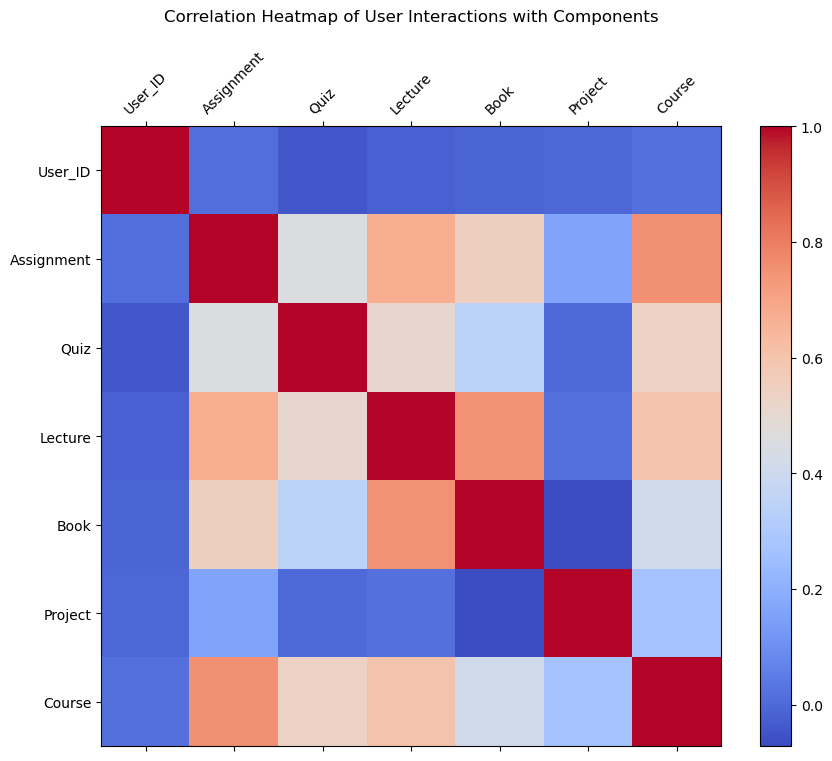

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=45)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)
plt.title('Correlation Heatmap of User Interactions with Components', pad=20)
plt.show()

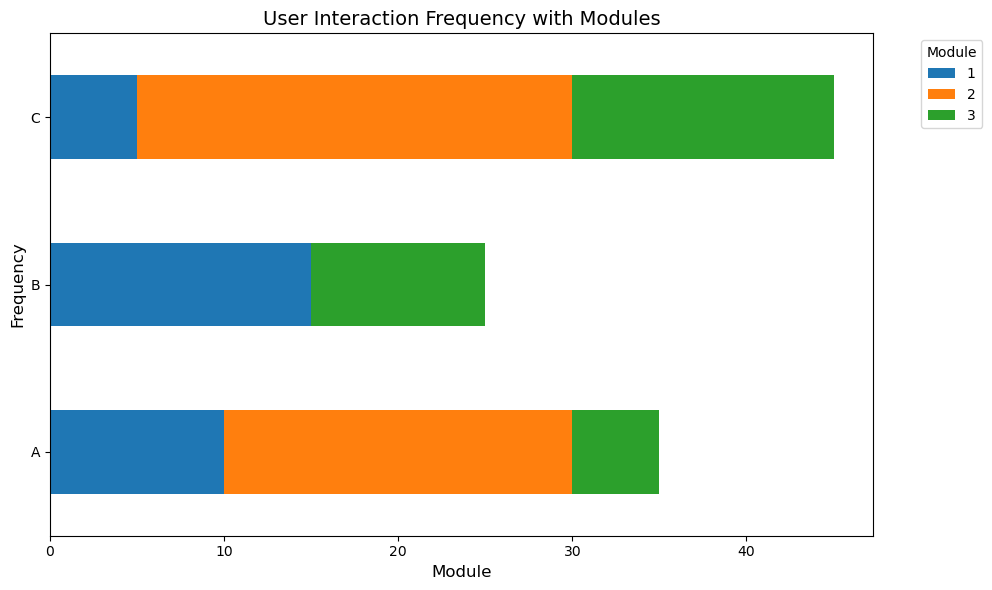

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'User_ID': [1, 1, 1, 2, 2, 3, 3, 3],
    'Module': ['A', 'B', 'C', 'A', 'C', 'A', 'B', 'C'],
    'Frequency': [10, 15, 5, 20, 25, 5, 10, 15]
}
df = pd.DataFrame(data)

# Pivot the data to reshape for plotting
pivot_df = df.pivot(index='User_ID', columns='Module', values='Frequency').fillna(0)

# Plot a line graph for each user
pivot_df.T.plot(kind='barh', stacked=True, figsize=(10, 6))
# pivot_df.reset_index().plot(kind='scatter', x='User_ID', y='Frequency')

# Add labels and title
plt.title('User Interaction Frequency with Modules', fontsize=14)
plt.xlabel('Module', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Module', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

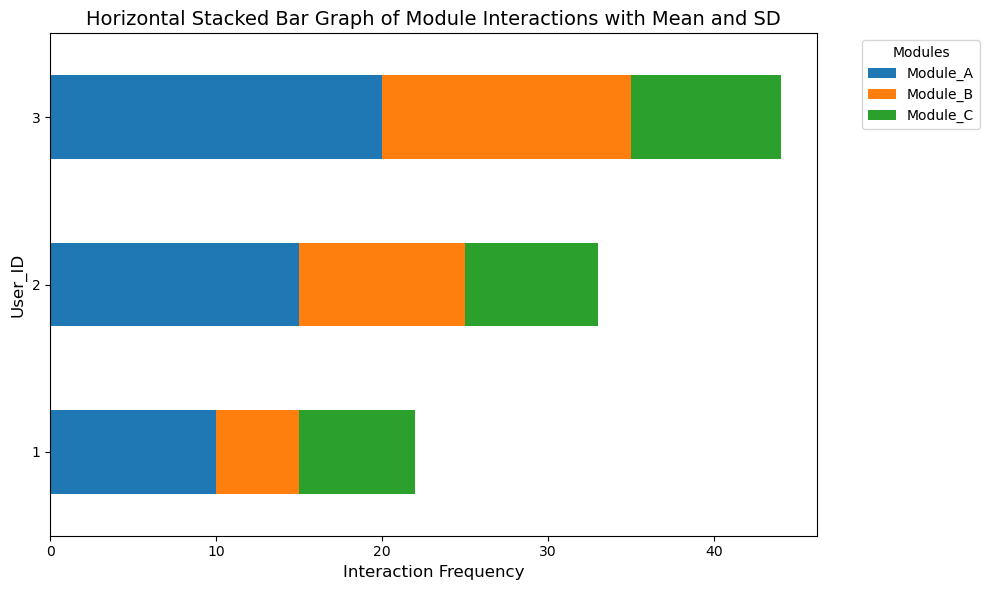

In [106]:
data = {
    'User_ID': [1, 2, 3],
    'Module_A': [10, 15, 20],
    'Module_B': [5, 10, 15],
    'Module_C': [7, 8, 9]
}
df = pd.DataFrame(data)

# Set User_ID as the index for better visualization in horizontal bars
df.set_index('User_ID', inplace=True)

# Calculate mean and standard deviation for each user
means = df.mean(axis=1)
std_devs = df.std(axis=1)

# Plot a horizontal stacked bar graph
ax = df.plot(kind='barh', stacked=True, figsize=(10, 6))

# Add mean and standard deviation as annotations
for i, user_id in enumerate(df.index):
    ax.text(df.iloc[i, :].sum() + 1, i, f'Mean: {means[i]:.2f}\nSD: {std_devs[i]:.2f}',
            va='center', ha='left', fontsize=10, color='black')

# Add labels and title
plt.title('Horizontal Stacked Bar Graph of Module Interactions with Mean and SD', fontsize=14)
plt.xlabel('Interaction Frequency', fontsize=12)
plt.ylabel('User_ID', fontsize=12)
plt.legend(title='Modules', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

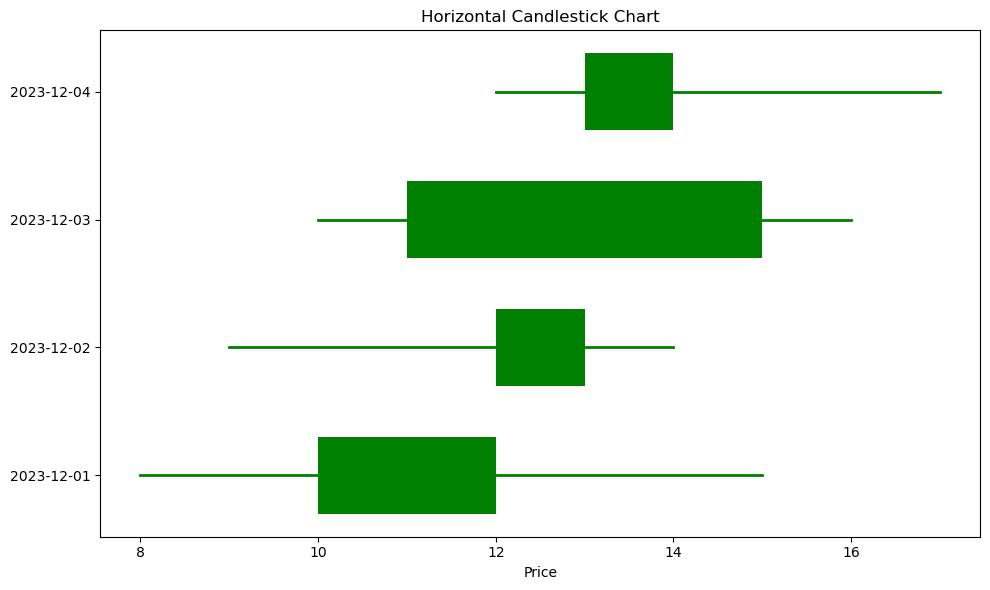

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with OHLC data (Open, High, Low, Close)
data = {
    'Date': ['2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04'],
    'Open': [10, 12, 11, 13],
    'High': [15, 14, 16, 17],
    'Low': [8, 9, 10, 12],
    'Close': [12, 13, 15, 14]
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each candlestick
for i in range(len(df)):
    # Define the open and close prices
    open_price = df['Open'].iloc[i]
    close_price = df['Close'].iloc[i]
    high_price = df['High'].iloc[i]
    low_price = df['Low'].iloc[i]

    # Define the color of the candlestick (green if up, red if down)
    color = 'green' if close_price > open_price else 'red'

    # Plot the high-low line
    ax.plot([high_price, low_price], [i, i], color=color, lw=2)  # High-Low line

    # Plot the open-close box
    ax.barh(i, abs(close_price - open_price), left=min(open_price, close_price), height=0.6, color=color)

# Set labels and title
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['Date'].dt.strftime('%Y-%m-%d'))
ax.set_xlabel('Price')
ax.set_title('Horizontal Candlestick Chart')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [72]:
selected_components = ['Quiz', 'Lecture', 'Assignment', 'Attendance', 'Survey']
stats = {}
for component in selected_components:
    if component in pivot_data.columns:
        stats[component] = {
            'mean': pivot_data[component].mean(),
            'mode': pivot_data[component].mode().iloc[0] if not pivot_data[component].mode().empty else np.nan,
            'median': pivot_data[component].median()
        }
stats


{'Quiz': {'mean': 34.98233215547703, 'mode': 0, 'median': 0.0},
 'Lecture': {'mean': 13.503533568904594, 'mode': 0, 'median': 2.0},
 'Assignment': {'mean': 78.14840989399293, 'mode': 0, 'median': 64.0},
 'Survey': {'mean': 2.3180212014134276, 'mode': 0, 'median': 0.0}}

In [73]:
# Print statistics for each month and entire semester
semester_stats = pd.DataFrame(stats).transpose()
semester_stats

,mean,mode,median
Quiz,34.982332,0.0,0.0
Lecture,13.503534,0.0,2.0
Assignment,78.148410,0.0,64.0
Survey,2.318021,0.0,0.0


In [74]:
print("Monthly Statistics")
print(pivot_data.groupby('Month')[selected_components].agg(['mean', 'median']).transpose())
print("\nSemester Statistics")
print(semester_stats)

Monthly Statistics


KeyError: "Columns not found: 'Attendance'"

In [39]:
component_df.to_sql("components", conn, if_exists='append', index=False)
merge_log_df.to_sql("merge_log", conn, if_exists='append', index=False)

InterfaceError: Error binding parameter 6 - probably unsupported type.

In [14]:
cur = conn.cursor()
for row in cur.execute('SELECT * FROM components;'):
    print(row)

('Course', 'Cour')
('Quiz', 'Quiz')
('Assignment', 'Assign')
('System', 'Sys')
('Lecture', 'Lect')
('Study_material', 'Study_mat')
('Manual', 'Man')
('Survey', 'Survey')
('Folder', 'Fold')
('Attendence', 'Attend')
('Page', 'Page')
('Test', 'Test')
('URL', 'Url')
('Book', 'Book')
('Source', 'Sourc')
('Questionnaire', 'Quest')
('Feedback', 'Feedback')
('Project', 'Proj')


In [15]:

def import_hook(files):
    dataframes = []
    try:
        for file in files:
            dataframes.append(pd.read_csv(file))
    except Exception as e:
        app.set_status("File Read error: " + str(e))
        return
    prep_df(dataframes)


def prep_df(dataframes):
    if dataframes is None:
        app.set_status("No data selected")
        return

    global user_log_df
    global activity_log_df
    global component_df

    user_log_df = next((f for f in dataframes if "Date" in f.columns), None)
    activity_log_df = next((f for f in dataframes if "Action" in f.columns), None)
    component_df = next((f for f in dataframes if "Code" in f.columns), None)

    if user_log_df is None:
        app.set_status("User Log Data Not Found")
        return
    if activity_log_df is None:
        app.set_status("Activity Log Data Not Found")
        return
    if component_df is None:
        app.set_status("Component Data Not Found")
        return

    if not valid_data():
        app.set_status("Data is not valid")
        return

    assert transformation_remove()
    transformation_rename()
    transformation_merge()
    transformation_reshape()
    transformation_count()
    transformation_output_statistics()
    transformation_output_correlation()


def valid_data():
    global user_log_df
    global activity_log_df

    intersection = np.intersect1d(user_log_df.columns, activity_log_df.columns)

    user_int = user_log_df[intersection]
    activity_int = activity_log_df[intersection]

    # if the rows, that are common in both data frames do intersect with different data
    # the data is deemed invalid and processing cannot continue
    return (user_int == activity_int).all(axis=1).all()


def transformation_remove():
    # 1. REMOVE: No outputs should include any data from Component: System, and Folder.
    delete_col_name = '__delete_row'

    global user_log_df
    global activity_log_df
    global component_df

    # Function to mark rows for deletion based on a condition
    def mark_for_deletion(df, cond):
        df.loc[cond, delete_col_name] = True
        return df

    # Mark rows for deletion
    condition = (lambda df: (df['Component'] == 'System') | (df['Component'] == 'Folder'))

    component_df = mark_for_deletion(component_df, condition(component_df))
    activity_log_df = mark_for_deletion(activity_log_df, condition(activity_log_df))

    # Propagate deletion from activity_log_df to user_log_df
    filtered_indexes = activity_log_df[activity_log_df[delete_col_name] == True].index
    user_log_df.loc[filtered_indexes, delete_col_name] = True

    # Drop marked rows
    def drop_marked_rows(df):
        return df.drop(df[df[delete_col_name] == True].index).drop(columns=[delete_col_name])

    user_log_df = drop_marked_rows(user_log_df)
    activity_log_df = drop_marked_rows(activity_log_df)
    component_df = drop_marked_rows(component_df)

    if len(user_log_df) != len(activity_log_df):
        pass
    return user_log_df, activity_log_df


def transformation_rename(user_log_df, activity_log_df):
    # 2. RENAME: The column “User Full Name *Anonymized” should be renamed
    # as User_ID both in ACTIVITY_LOG and USER_LOG CSVs.
    col_name_change = {'User Full Name *Anonymized': 'User_ID'}
    activity_log_df.rename(columns=col_name_change, inplace=True)
    user_log_df.rename(columns=col_name_change, inplace=True)
    return user_log_df, activity_log_df


def transformation_merge(user_log_df, activity_log_df):
    # 3. MERGE: Merge the suitable CSVs for analysing user interactions with each component.
    return pd.concat([user_log_df, activity_log_df.drop('User_ID', axis=1)], axis=1)


def transformation_reshape(merge_log_df, col_name, period):
    # 4. RESHAPE: Reshape the data using pivot operation.

    merge_log_df['Date'] = (pd.to_datetime(merge_log_df['Date'], format='%d/%m/%Y %H:%M') +
                            pd.to_timedelta(merge_log_df['Time']))

    # Drop the original 'Date' and 'Time' columns if no longer needed
    merge_log_df = merge_log_df.drop(columns=['Time']).rename(columns={'Date': 'Datetime'})

    merge_log_df[col_name] = merge_log_df['Datetime'].dt.to_period(period)

    pt = merge_log_df.pivot_table(
        index=['User_ID', 'Month'],
        columns='Component',
        values='Action',
        aggfunc='count',
        fill_value=0
    )

    pivot_data.columns = [col for col in pivot_data.columns]

    return pivot_data.reset_index()


def transformation_count(pivot_data, col_name):
    # 5. COUNT: The interactions for each user with the Component for each month.
    pivot_data['Total Interaction'] = pivot_data.loc[:, ~pivot_data.columns.isin(['User_ID', col_name])].sum(axis=1)


def transformation_output_statistics(pivot_df, period):
    #     OUTPUT STATISTICS: Produce the mean, mode and median for the components: Quiz, Lecture, Assignment, Attendance, and Survey.
    # - For each month
    # - For the entire 13-week academic semester
    selected_components = ['User_ID', period, 'Quiz', 'Lecture', 'Assignment', 'Attendence', 'Survey']
    raw_data = pivot_data[selected_components]
    monthly_stats = raw_data[['User_ID', period]].copy()
    data_df = raw_data.loc[:, ~raw_data.columns.isin(['User_ID', period])]
    monthly_stats['Mean'] = data_df.mean(axis=1)
    monthly_stats['Median'] = data_df.median(axis=1)
    monthly_stats['Mode'] = data_df.mode(axis=1).iloc[:, 0]
    return monthly_stats


def transformation_output_correlation():
    correlation_components = ['Assignment', 'Quiz', 'Lecture', 'Book', 'Project', 'Course']
    correlation_data = pivot_data[['User_ID'] + [c for c in correlation_components if c in pivot_data.columns]]
    return correlation_data.corr()


app = GuiApp(import_hook)

app.mainloop()